### House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./house_prices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Removing the <span style='color: blue; background-color: yellow;'>[Id]</span> column

In [3]:
df = df.drop('Id',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           1460 non-null   int64  
 1   Zone_Class           1460 non-null   object 
 2   LotFrontage          1201 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   Road_Type            1460 non-null   object 
 5   Alley                91 non-null     object 
 6   Property_Shape       1460 non-null   object 
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   object 
 11  Neighborhood         1460 non-null   object 
 12  Condition1           1460 non-null   object 
 13  Condition2           1460 non-null   object 
 14  Dwelling_Type        1460 non-null   object 
 15  HouseStyle           1460 non-null   o

In [5]:
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [6]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

In [7]:
df_numerical.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [8]:
df_categorical.columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
df_numerical.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC                 1453
MiscFeature            1406
Alley                  1369
Fence                  1179
MasVnrType              872
                       ... 
Heating                   0
HeatingQC                 0
Zone_Class                0
1stFlrSF                  0
Property_Sale_Price       0
Length: 80, dtype: int64

In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            17.739726
LotArea                 0.000000
Road_Type               0.000000
                         ...    
MoSold                  0.000000
YrSold                  0.000000
SaleType                0.000000
SaleCondition           0.000000
Property_Sale_Price     0.000000
Length: 80, dtype: float64

In [12]:
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)

In [13]:
missing

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageType,81,5.547945


In [14]:
missing = missing.rename_axis('Feature')

In [15]:
missing.shape

(19, 2)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

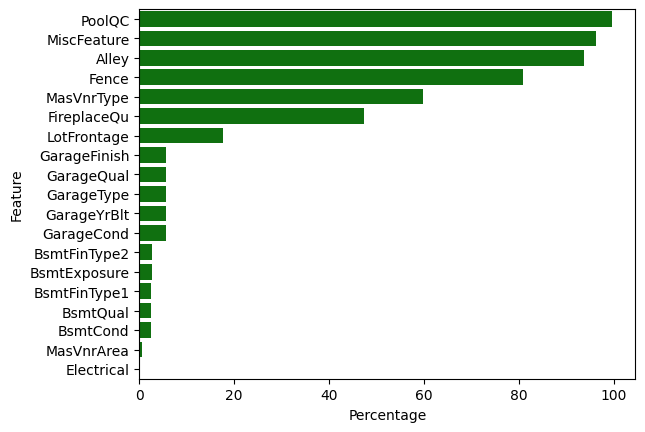

In [16]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

(1.0, 0.0)

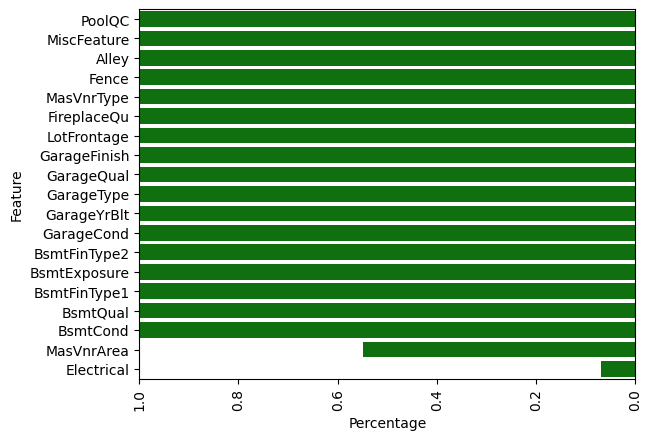

In [17]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')
plt.xticks(rotation=90)
# Set 1% Threshold
plt.xlim(1, 0)

In [18]:
df[df['MasVnrArea'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

<b>MasVnrArea</b>: Masonry veneer area in square feet. مساحة القشرة الحجرية<br> 
<b>Electrical</b>: Type of electrical system (e.g., standard, fuse box). النظام الكهربائي

In [19]:
missing[missing['Percentage'] < 1]

,Missing Values,Percentage
Feature,,
MasVnrArea,8,0.547945
Electrical,1,0.068493


### In the Next Step, We Fill all <span style='color: blue; background-color: yellow;'>[MasVnrArea]</span> with 0

In [20]:
mas_vnr_area = ['MasVnrArea']
df[mas_vnr_area] = df[mas_vnr_area].fillna(0)

In [21]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [22]:
missing.shape

(18, 2)

In [23]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [24]:
df[df['Electrical'].isnull()]['Electrical']

1379    NaN
Name: Electrical, dtype: object

### In the Next Step, We will delete <span style='color: blue; background-color: yellow;'>[Electrical]</span> row that have Nan value.

In [25]:
df = df.dropna(axis=0,subset= ['Electrical'])

In [26]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
PoolQC,1452,99.520219
MiscFeature,1405,96.298835
Alley,1368,93.762851
Fence,1178,80.740233
MasVnrType,871,59.698424
FireplaceQu,689,47.224126
LotFrontage,259,17.751885
GarageFinish,81,5.551748
GarageQual,81,5.551748


In [27]:
missing.shape

(17, 2)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

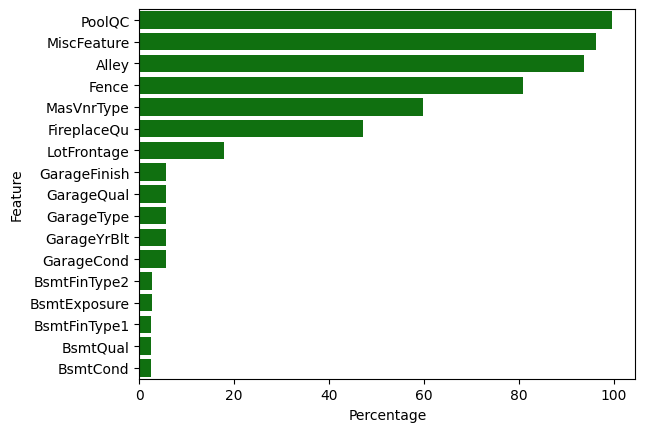

In [28]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

- BsmtCond: Condition of the basement (a rating).
- BsmtQual: Quality of the basement (a rating).
- BsmtFinType1: Type of finished basement (e.g., rec room, living space).
- BsmtExposure: Exposure level of the basement (e.g., walkout, garden level).
- BsmtFinType2: Type of secondary finished basement (if applicable).

In [29]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()].shape

(37, 5)

In [30]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtQual'].isnull()].shape

(37, 5)

In [31]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtFinType1'].isnull()].shape

(37, 5)

In [32]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtFinType2'].isnull()].shape

(38, 5)

In [33]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtFinType2'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,TA,Gd,GLQ,No,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [34]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtFinType2'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,TA,Gd,GLQ,No,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [35]:
df.loc[332, 'BsmtFinType2'] = 'None'

In [36]:
df.iloc[332]['BsmtFinType2']


'None'

In [37]:
df.iloc[332]

Dwell_Type                 20
Zone_Class                 RL
LotFrontage              85.0
LotArea                 10655
Road_Type                Pave
                        ...  
MoSold                     10
YrSold                   2009
SaleType                   WD
SaleCondition          Normal
Property_Sale_Price    284000
Name: 332, Length: 80, dtype: object

In [38]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtFinType2'].isnull()].shape

(37, 5)

In [39]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtExposure'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


### I Assumed here that the basement has no Exposure.

In [40]:
df.loc[948, 'BsmtExposure'] = 'No'

In [41]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtExposure'].isnull()].shape

(37, 5)

In [42]:
df[df['BsmtCond'].isnull()]

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
17,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [43]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()].shape

(37, 5)

### The abbreviations for "Basement Condition" typically represent the following conditions:

- TA: Typical/Average
- Gd: Good
- Fa: Fair
- Po: Poor

In [44]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [45]:
df['BsmtCond'].isnull().sum()

37

### For "Basement Quality," the abbreviations typically stand for:

- Gd: Good
- TA: Typical/Average
- Ex: Excellent
- Fa: Fair

In [46]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [47]:
df['BsmtQual'].isnull().sum()

37

For Bsmt FinType2 (which describes the type of finish for the second finished area of the basement), the abbreviations typically mean:

- Unf: Unfinished
- BLQ: Below Average Quality
- ALQ: Average to Low Quality
- Rec: Recreational Room
- LwQ: Low Quality
- GLQ: Good Living Quarters

In [48]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ', 'None'],
      dtype=object)

In [49]:
df['BsmtFinType2'].isnull().sum()

37

For BsmtExposure (which describes the exposure level of a basement), the abbreviations typically stand for:

- No: No exposure
- Gd: Good exposure
- Mn: Minor exposure
- Av: Average exposure
- These codes indicate how much of the basement is above ground level and its overall exposure to natural light and the outdoors.

تشير هذه الرموز إلى مقدار الطابق السفلي فوق مستوى سطح الأرض ومدى تعرضه الإجمالي للضوء الطبيعي والهواء الطلق.

In [50]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [51]:
df['BsmtExposure'].isnull().sum()

37

### After reviewing the data related to the ground floor, we found that the entries without values for the basement mostly belong to houses that do not have a basement.

In [52]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [53]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [54]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2


In [55]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
PoolQC,1452,99.520219
MiscFeature,1405,96.298835
Alley,1368,93.762851
Fence,1178,80.740233
MasVnrType,871,59.698424
FireplaceQu,689,47.224126
LotFrontage,259,17.751885
GarageCond,81,5.551748
GarageFinish,81,5.551748


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

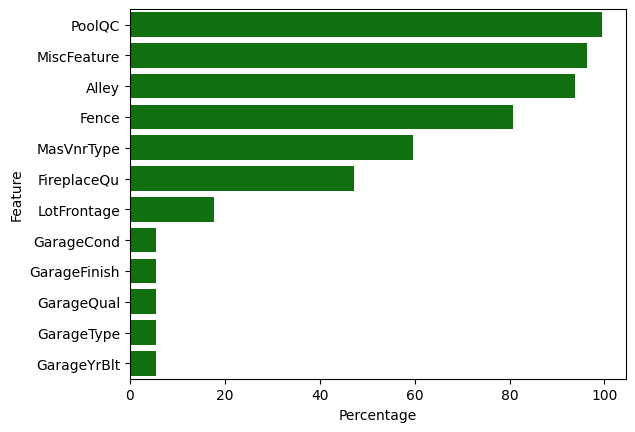

In [56]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

- **GarageQual**: Quality of the garage (a rating).
- **GarageCond**: Condition of the garage (a rating).
- **GarageYrBlt**: Year the garage was built.
- **GarageFinish**: Interior finish of the garage (e.g., unfinished, finished).
- **GarageType**: Type of garage (e.g., attached, detached).

In [105]:
df[['GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageType']][df['GarageQual'].isnull()].all()

GarageQual      True
GarageCond      True
GarageYrBlt     True
GarageFinish    True
GarageType      True
dtype: bool

### To Be Sure That there is no null value more than the 81 row

In [106]:
df[df['GarageType'].isnull()].shape

(0, 76)

In [59]:
df[df['GarageQual'].isnull()].shape

(81, 80)

In [60]:
df[df['GarageYrBlt'].isnull()].shape

(81, 80)

In [61]:
df[df['GarageFinish'].isnull()].shape

(81, 80)

In [62]:
df[df['GarageType'].isnull()].shape

(81, 80)

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [63]:
df[['GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageType']]

,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageType
0,TA,TA,2003.0,RFn,Attchd
1,TA,TA,1976.0,RFn,Attchd
2,TA,TA,2001.0,RFn,Attchd
3,TA,TA,1998.0,Unf,Detchd
4,TA,TA,2000.0,RFn,Attchd
...,...,...,...,...,...
1455,TA,TA,1999.0,RFn,Attchd
1456,TA,TA,1978.0,Unf,Attchd
1457,TA,TA,1941.0,RFn,Attchd
1458,TA,TA,1950.0,Unf,Attchd


In [64]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [65]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

### Now There is no null values in the garage columns

In [67]:
df[['GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish', 'GarageType']][df['GarageQual'].isnull()]

,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageType


In [68]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
PoolQC,1452,99.520219
MiscFeature,1405,96.298835
Alley,1368,93.762851
Fence,1178,80.740233
MasVnrType,871,59.698424
FireplaceQu,689,47.224126
LotFrontage,259,17.751885


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

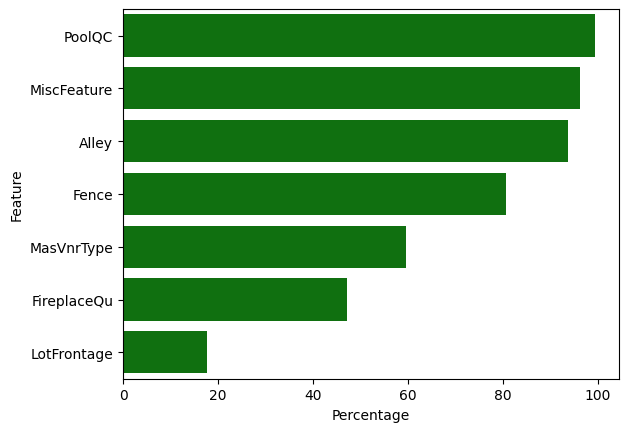

In [69]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

### Features That have missing data more than 80%

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access



 if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0.

In [71]:
df[['PoolQC', 'MiscFeature', 'Alley', 'Fence']]

,PoolQC,MiscFeature,Alley,Fence
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,MnPrv
1457,NaN,Shed,NaN,GdPrv
1458,NaN,NaN,NaN,NaN


In [72]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [73]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
MasVnrType,871,59.698424
FireplaceQu,689,47.224126
LotFrontage,259,17.751885


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

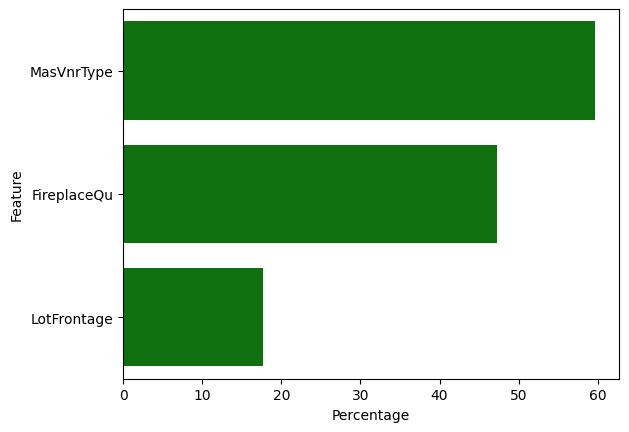

In [74]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

### Here you can see that when the [MasVnrArea] = 0, the [MasVnrType] is Nan.
### So we can assume that there is no Area no Type, set to None.

In [77]:
df[['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,NaN,0.0
2,BrkFace,162.0
3,NaN,0.0
4,BrkFace,350.0
...,...,...
1455,NaN,0.0
1456,Stone,119.0
1457,NaN,0.0
1458,NaN,0.0


In [87]:
df[['MasVnrType', 'MasVnrArea']][df['MasVnrArea'] == 0]['MasVnrType'].isnull()

1       True
3       True
5       True
8       True
9       True
        ... 
1454    True
1455    True
1457    True
1458    True
1459    True
Name: MasVnrType, Length: 868, dtype: bool

In [88]:
df[['MasVnrType', 'MasVnrArea']][df['MasVnrArea'] == 0]['MasVnrType'].isnull().sum()

866

In [89]:
df[['MasVnrType', 'MasVnrArea']][(df['MasVnrArea'] == 0) & (df['MasVnrType'].isnull())]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [91]:
df[['MasVnrType', 'MasVnrArea']][(df['MasVnrArea'] == 0) & (df['MasVnrType'].notna())]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [79]:
df[['MasVnrType']].isnull().sum()

MasVnrType    871
dtype: int64

In [92]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [93]:
df[['MasVnrType']].isnull().sum()

MasVnrType    0
dtype: int64

In [94]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
FireplaceQu,689,47.224126
LotFrontage,259,17.751885


(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50')])

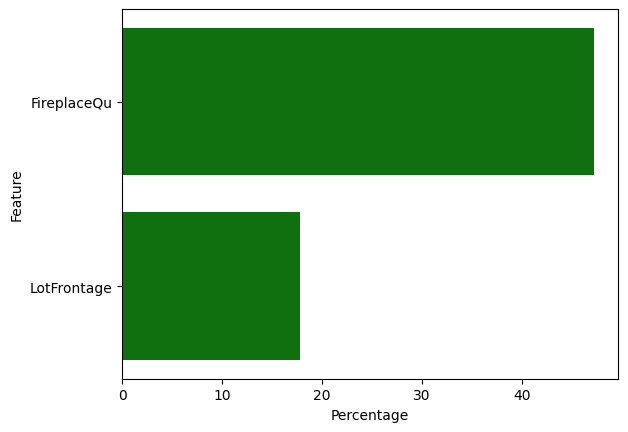

In [95]:

sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

### Filling in Fireplace Quality based on Description Text

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [96]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")

In [97]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
# View columns with missing data
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)
missing = missing.rename_axis('Feature')
missing

,Missing Values,Percentage
Feature,,
LotFrontage,259,17.751885


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

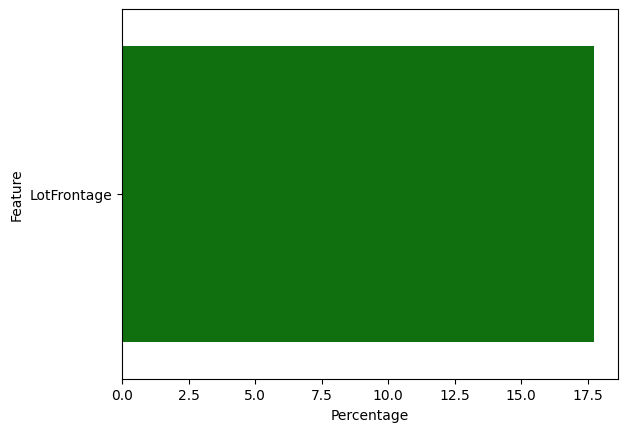

In [98]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks()

### LotFrontage: Linear feet of street connected to property

In [100]:
df['LotFrontage'][df['LotFrontage'].isnull()]

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

### Impute Missing Data based on other Features

In [101]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [103]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64